# Loading Portfolio data

The `ppt/portfolio_analysis.py` file contains functions for predefined analyses, however, you can still using the `StockPriceLoader` and `CalculateStockValue` classes directly to load the raw data to do your own independant analysis.

However, everyone's portfolio is unique and everyone has slightly different requirements for their analysis (one of the reasons for making this library!). 

This notebook explains how you can directly use the data loading classes which are wrapped within the main `Portfolio` object for low level access to the raw data.

In [1]:
%load_ext autoreload
%autoreload 2

# !pip install nb_black
%load_ext nb_black

&lt;IPython.core.display.Javascript object&gt;

In [2]:
import sys
sys.path.append("..")

&lt;IPython.core.display.Javascript object&gt;

In [3]:
import pandas as pd
import ffn

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from ppt.data_loader import PositionLoader
from ppt.data_loader import StockPriceLoader
from ppt.data_loader import BenchMarkLoader
from ppt.data_loader import CurrencyLoader

&lt;IPython.core.display.Javascript object&gt;

## Input data format

See the `README` for explainations on the required data input format.

In [4]:
# example input
pd.read_csv("../data/raw/purchase_info.csv")

,date,action,company,yahoo_ticker,currency,num_shares,stock_price_usd,trading_costs_usd,total_usd,total_shares_held
0,17/07/2019,CASH IN,cash,cash,USD,0,100000.0000,0.00,100000.00,0
1,17/07/2019,BUY,Intel,INTC,USD,180,49.9100,4.95,8988.75,180
2,17/07/2019,BUY,Applied Materials,AMAT,USD,268,45.9151,4.95,12310.20,268
3,17/07/2019,BUY,MKS Instruments,MKSI,USD,120,76.7449,4.95,9214.34,120
4,17/07/2019,BUY,Synopsys,SNPS,USD,68,136.8084,4.95,9307.92,68
5,17/07/2019,BUY,SOXX ETF,SOXX,USD,75,204.2607,4.95,15324.50,75
6,18/07/2019,BUY,Nvidia,NVDA,USD,39,166.6700,4.95,6505.08,39
7,24/07/2019,BUY,Tokyo Electron,8035.T,JPY,100,168.4135,126.31,16967.66,100
8,24/07/2019,BUY,BE Semiconductor Industries,BESI.AS,EUR,420,29.9253,100.00,12668.63,420
9,26/11/2019,SELL,Nvidia,NVDA,USD,5,217.0000,4.95,1089.95,34


&lt;IPython.core.display.Javascript object&gt;

## Load Positions

The base case for all classes is `PositionLoader` this loads the raw input data and extracts some key information which is used by other classes to help with data processing

In [5]:
# automatically loads from default data location (../data/raw/purchase_info.csv)
positions = PositionLoader()

&lt;IPython.core.display.Javascript object&gt;

In [6]:
#properties
def print_properties(object):
    for attr in dir(object):
        if attr[0] != '_':
            print(attr)

print_properties(positions)

datetime_index
input_data_source
positions
start_date
stock_metadata
tickers


&lt;IPython.core.display.Javascript object&gt;

In [7]:
# dataframe with input csv data
positions.positions

,date,action,company,yahoo_ticker,currency,num_shares,stock_price_usd,trading_costs_usd,total_usd,total_shares_held
0,2019-07-17,CASH IN,cash,cash,USD,0,100000.0000,0.00,100000.00,0
1,2019-07-17,BUY,Intel,INTC,USD,180,49.9100,4.95,8988.75,180
2,2019-07-17,BUY,Applied Materials,AMAT,USD,268,45.9151,4.95,12310.20,268
3,2019-07-17,BUY,MKS Instruments,MKSI,USD,120,76.7449,4.95,9214.34,120
4,2019-07-17,BUY,Synopsys,SNPS,USD,68,136.8084,4.95,9307.92,68
5,2019-07-17,BUY,SOXX ETF,SOXX,USD,75,204.2607,4.95,15324.50,75
6,2019-07-18,BUY,Nvidia,NVDA,USD,39,166.6700,4.95,6505.08,39
7,2019-07-24,BUY,Tokyo Electron,8035.T,JPY,100,168.4135,126.31,16967.66,100
8,2019-07-24,BUY,BE Semiconductor Industries,BESI.AS,EUR,420,29.9253,100.00,12668.63,420
9,2019-11-26,SELL,Nvidia,NVDA,USD,5,217.0000,4.95,1089.95,34


&lt;IPython.core.display.Javascript object&gt;

In [8]:
#tickers
positions.tickers

[&#39;INTC&#39;, &#39;AMAT&#39;, &#39;MKSI&#39;, &#39;SNPS&#39;, &#39;SOXX&#39;, &#39;NVDA&#39;, &#39;8035.T&#39;, &#39;BESI.AS&#39;]

&lt;IPython.core.display.Javascript object&gt;

In [9]:
#metadata
positions.stock_metadata

{&#39;INTC&#39;: {&#39;company&#39;: &#39;Intel&#39;, &#39;currency&#39;: &#39;USD&#39;},
 &#39;AMAT&#39;: {&#39;company&#39;: &#39;Applied Materials&#39;, &#39;currency&#39;: &#39;USD&#39;},
 &#39;MKSI&#39;: {&#39;company&#39;: &#39;MKS Instruments&#39;, &#39;currency&#39;: &#39;USD&#39;},
 &#39;SNPS&#39;: {&#39;company&#39;: &#39;Synopsys&#39;, &#39;currency&#39;: &#39;USD&#39;},
 &#39;SOXX&#39;: {&#39;company&#39;: &#39;SOXX ETF&#39;, &#39;currency&#39;: &#39;USD&#39;},
 &#39;NVDA&#39;: {&#39;company&#39;: &#39;Nvidia&#39;, &#39;currency&#39;: &#39;USD&#39;},
 &#39;8035.T&#39;: {&#39;company&#39;: &#39;Tokyo Electron&#39;, &#39;currency&#39;: &#39;JPY&#39;},
 &#39;BESI.AS&#39;: {&#39;company&#39;: &#39;BE Semiconductor Industries&#39;, &#39;currency&#39;: &#39;EUR&#39;}}

&lt;IPython.core.display.Javascript object&gt;

## Load Stock Prices

You are able to load a dataframe of daily closing stock prices for all stock tickers present in the `purchase_info.csv`, starting from the earliest date of your first position, using the `StockPriceLoader` class.

Note the default location for the input data file is: `../data/raw/purchase_info.csv`, however, you can specify your own location using the `input_data_source` argument.

The `StockPriceLoader` class uses the `ffn` library to load the stock prices for free from Yahoo ([see ffn library for more details](https://pmorissette.github.io/ffn/)).

In [10]:
# load stock prices of tickers in your purchase_info csv file
stock_prices = StockPriceLoader()

&lt;IPython.core.display.Javascript object&gt;

In [11]:
# __repr__ gives a list of tickers and the starting date
stock_prices

Tickers: [&#39;INTC&#39;, &#39;AMAT&#39;, &#39;MKSI&#39;, &#39;SNPS&#39;, &#39;SOXX&#39;, &#39;NVDA&#39;, &#39;8035.T&#39;, &#39;BESI.AS&#39;]
Start Date: 2019-07-17 00:00:00

&lt;IPython.core.display.Javascript object&gt;

In [12]:
print_properties(stock_prices)

daily_stock_prices_local_currency
daily_stock_prices_usd
datetime_index
input_data_source
positions
start_date
stock_metadata
tickers


&lt;IPython.core.display.Javascript object&gt;

The `StockPriceLoader` inherits the same properties from the `PositionLoader` seen above. There are two new properties: `daily_stock_prices_local_currency` and `daily_stock_prices_usd`. These are dataframes containing the daily stock prices for each ticker and the daily stock prices converted from the local currency to usd, starting from the earliest registered date in the input csv.

In [13]:
#local currencies
stock_prices.daily_stock_prices_local_currency.head(10)

,INTC,AMAT,MKSI,SNPS,SOXX,NVDA,8035.T,BESI.AS
2019-07-17,47.952766,45.377625,77.286873,135.750000,201.027237,169.188049,15937.312500,23.886831
2019-07-18,48.486755,47.292084,79.584183,136.039993,203.936676,169.656601,15865.198242,23.770264
2019-07-19,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951,16418.076172,24.576529
2019-07-20,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951,16418.076172,24.576529
2019-07-21,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951,16418.076172,24.576529
2019-07-22,49.855732,49.805428,82.247879,135.419998,207.593140,170.793091,16605.574219,25.557648
2019-07-23,50.244091,50.099960,83.960953,136.160004,210.256882,175.119736,17110.376953,25.917067
2019-07-24,51.380039,51.189732,88.664520,137.619995,216.665527,178.110519,17211.335938,26.801044
2019-07-25,50.642159,49.893784,85.703758,137.500000,213.028702,172.846756,17836.328125,27.189606
2019-07-26,50.088745,49.815247,86.713776,137.089996,212.969757,174.531570,17591.140625,26.985613


&lt;IPython.core.display.Javascript object&gt;

In [14]:
# converted to USD
stock_prices.daily_stock_prices_usd.head(10)

,INTC,AMAT,MKSI,SNPS,SOXX,NVDA,8035.T,BESI.AS
2019-07-17,47.952766,45.377625,77.286873,135.750000,201.027237,169.188049,147.653842,26.824066
2019-07-18,48.486755,47.292084,79.584183,136.039993,203.936676,169.656601,147.719278,26.768920
2019-07-19,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951,152.867069,27.676896
2019-07-20,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951,152.867069,27.676896
2019-07-21,48.807159,46.938648,78.425613,134.990005,203.700790,167.921951,152.287146,27.570707
2019-07-22,49.855732,49.805428,82.247879,135.419998,207.593140,170.793091,153.892107,28.640192
2019-07-23,50.244091,50.099960,83.960953,136.160004,210.256882,175.119736,158.089805,28.900783
2019-07-24,51.380039,51.189732,88.664520,137.619995,216.665527,178.110519,159.085810,29.862887
2019-07-25,50.642159,49.893784,85.703758,137.500000,213.028702,172.846756,164.138990,30.305967
2019-07-26,50.088745,49.815247,86.713776,137.089996,212.969757,174.531570,161.882650,30.078594


&lt;IPython.core.display.Javascript object&gt;

This is the 'raw' data from which all further calculations are made. You can use these dataframe of stock prices for your own individual stock analysis.

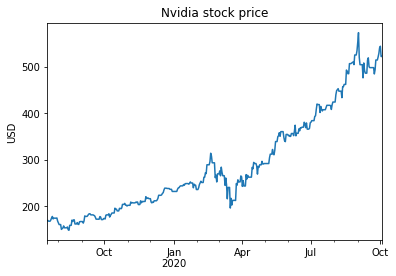

&lt;IPython.core.display.Javascript object&gt;

In [15]:
stock_prices.daily_stock_prices_local_currency['NVDA'].plot()
plt.title("Nvidia stock price")
plt.ylabel("USD")
plt.show()


## Benchmarks

Sometimes you will want to benchmark your portfolio against indices or other instruments.

The `BenchMarkLoader` inherits from `PositionLoader`

A single benchmark passed as a string or a list of benchmarks can be passed to the function.

In [16]:
# load SNP 500 
benchmark = '^GSPC'
bm = BenchMarkLoader(benchmark_tickers=benchmark)
bm.benchmark_stock_prices

,^GSPC
2019-07-17,2984.419922
2019-07-18,2995.110107
2019-07-19,2976.610107
2019-07-20,2976.610107
2019-07-21,2976.610107
...,...
2020-09-29,3335.469971
2020-09-30,3363.000000
2020-10-01,3380.800049
2020-10-02,3348.419922


&lt;IPython.core.display.Javascript object&gt;

In [17]:
#list benchmarks
bm.benchmarks

&#39;^GSPC&#39;

&lt;IPython.core.display.Javascript object&gt;

## Currency Loader

Historical daily exchange rates are collected from yahoo finance.

In [18]:
cur = CurrencyLoader()

print_properties(cur)

CURRENCIES
currencies
datetime_index
input_data_source
positions
start_date
stock_metadata
tickers
xrates


&lt;IPython.core.display.Javascript object&gt;

In [19]:
cur.currencies

[&#39;USD&#39;, &#39;JPY&#39;, &#39;EUR&#39;]

&lt;IPython.core.display.Javascript object&gt;

In [20]:
#daily exchange rates (including USD/USD)
cur.xrates

,USD,JPY,EUR
2019-07-17,1.0,0.009265,1.122965
2019-07-18,1.0,0.009311,1.126152
2019-07-19,1.0,0.009311,1.126152
2019-07-20,1.0,0.009311,1.126152
2019-07-21,1.0,0.009276,1.121831
...,...,...,...
2020-09-29,1.0,0.009464,1.174205
2020-09-30,1.0,0.009483,1.172608
2020-10-01,1.0,0.009483,1.172608
2020-10-02,1.0,0.009497,1.171509


&lt;IPython.core.display.Javascript object&gt;